In [127]:
import requests 
import gzip, shutil
import os 
import data_utils as du 
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
from six.moves import cPickle as pickle
import numpy as np
import os
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt 
import platform
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Data_folder = 'CIFAR10_Data'
Data_fn = 'cifar-10-python'
cifar_url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
#Chang to true if need download data 
Down_load_data = False 
if Down_load_data:
    r = requests.get(cifar_url,allow_redirects=True)
    open(os.path.join(Data_folder,Data_fn+'.tar.gz'),'wb').write(r.content)
    #Unzip the data



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
import tensorflow as tf 
from tensorflow import keras 
import numpy as np 
from six.moves import cPickle as pickle
import numpy as np
import os
from matplotlib.pyplot import imread
import platform

def load_pickle(f):
  version = platform.python_version_tuple()
  if version[0] == '2':
      return  pickle.load(f)
  elif version[0] == '3':
      return  pickle.load(f, encoding='latin1')
  raise ValueError("invalid python version: {}".format(version))

def load_CIFAR_batch(fn):
    with open(fn, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=10000,subtract_mean=True):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for training  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'CIFAR10_Data/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    ## Data post_process 
   
    if subtract_mean:
        mean_image = np.mean(X_train, axis=0)
        X_train -= mean_image
        X_val -= mean_image
        X_test -= mean_image
  

    return X_train, y_train, X_val, y_val, X_test, y_test
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape, y_train.dtype)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,) int64
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


## Question 1 


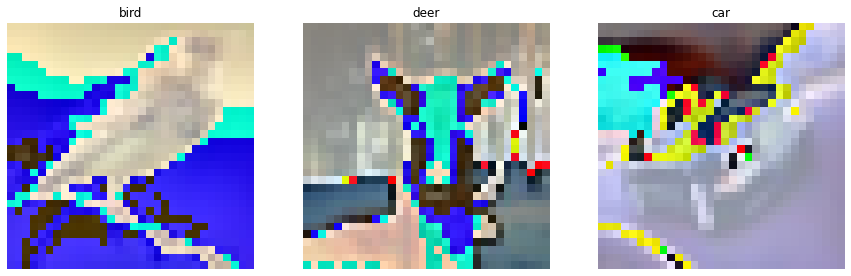

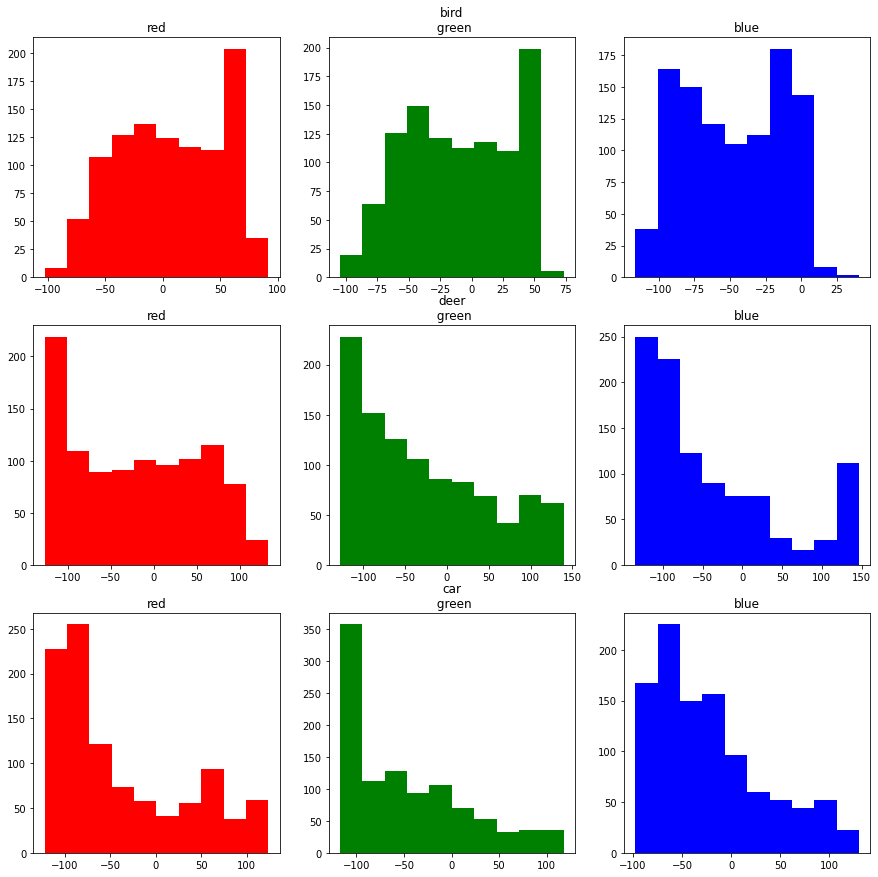

In [129]:
import random
import matplotlib.pyplot as plt 

random.seed('sed') 
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
image_num = 3 
image_idx = [random.randint(0,X_train.shape[0]) for p in range(0,image_num)]
for plt_idx, idx in enumerate(image_idx):
    cls = classes[y_train[idx]]
    plt.subplot(1,3,plt_idx+1)
    plt.imshow(X_train[idx].astype('uint8'))
    plt.axis('off')
    plt.title(cls)
plt.show()

# plot hisgram
for i, idx in enumerate(image_idx):
    img = X_train[idx].copy()
    cls = classes[y_train[idx]]
    for color_c in range(3):
        plt_idx = i*len(image_idx) +  color_c + 1 
        plt.subplot(len(image_idx),3,plt_idx)
        if color_c ==0:
            color = 'red'
            plt.title('red')
        elif color_c ==1:
            color = 'green'
            plt.title(cls+'\n green')
        elif color_c ==2:
            color = 'blue'
            plt.title('blue')
        plt.hist(img[:,:,color_c].reshape(-1),color=color)
        
plt.show()



## Question2 
 

# Construct model 
## Question 3


In [130]:
from cnn_model import *
options = {
    'conv1_out' : 18,
    'conv2_out' : 32,
    'fc0_out' : 120,
    'fc1_out' : 80,
}
model = Lennet5(in_channel=3, out_channel=10,options=options)

device = '/device:GPU:0'
#x = tf.placeholder(tf.float32, (None,32,32,3))
input_shape = (None, 32, 32, 3)
model.build(input_shape) # `input_shape` is the shape of the input data
                         # e.g. input_shape = (None, 32, 32, 3)
model.summary()





Model: "lennet5_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_123 (Conv2D)          multiple                  1368      
_________________________________________________________________
conv2d_124 (Conv2D)          multiple                  14432     
_________________________________________________________________
max_pooling2d_40 (MaxPooling multiple                  0         
_________________________________________________________________
flatten_61 (Flatten)         multiple                  0         
_________________________________________________________________
dense_143 (Dense)            multiple                  96120     
_________________________________________________________________
dense_144 (Dense)            multiple                  9680      
_________________________________________________________________
dense_145 (Dense)            multiple                  8

In [131]:
from solver import Solver
#model = ThreeLayerConvNet(12, 8, 10)
model = Lennet5(in_channel=3, out_channel=10,options=options)
data_set = {
    'train_data': X_train,
    'train_label': y_train,
    'val_data':X_val,
    'val_label':y_val,
}
options = {
    #'lr': 1e-4,
    'epoch_num': 30,
}

solver= Solver(model,data_set,options=options)
solver.train()


: 71.43592834472656, Val Loss: 0.996049702167511, Val Accuracy: 66.0
Iteration 22700, Epoch 15, Loss: 0.8152928352355957, Accuracy: 71.41610717773438, Val Loss: 0.974839985370636, Val Accuracy: 67.4000015258789
Iteration 22800, Epoch 15, Loss: 0.8150041103363037, Accuracy: 71.39689636230469, Val Loss: 0.979916512966156, Val Accuracy: 67.79999542236328
Iteration 22900, Epoch 15, Loss: 0.8136296272277832, Accuracy: 71.46636199951172, Val Loss: 0.9748706221580505, Val Accuracy: 67.5
Iteration 23000, Epoch 16, Loss: 0.7818769812583923, Accuracy: 72.4702377319336, Val Loss: 0.9696030020713806, Val Accuracy: 68.19999694824219
Iteration 23100, Epoch 16, Loss: 0.7954816222190857, Accuracy: 72.9080581665039, Val Loss: 0.9803413152694702, Val Accuracy: 67.79999542236328
Iteration 23200, Epoch 16, Loss: 0.7913459539413452, Accuracy: 72.36991119384766, Val Loss: 0.9612605571746826, Val Accuracy: 68.0
Iteration 23300, Epoch 16, Loss: 0.7909486293792725, Accuracy: 72.13784790039062, Val Loss: 0.9742

KeyboardInterrupt: 